In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression()
X = np.array([[1],[2],[3],[4],[5],[6]])
Y = np.array([0,0,0,1,1,1])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model.fit(x_train, y_train)
print("Training Accuracy:", model.score(x_train, y_train))
print("Testing Accuracy:", model.score(x_test, y_test))
print("Accuracy",accuracy_score(Y, model.predict(X)))
print("classification report")
print(classification_report(Y, model.predict(X)))


Training Accuracy: 0.75
Testing Accuracy: 1.0
Accuracy 0.8333333333333334
classification report
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



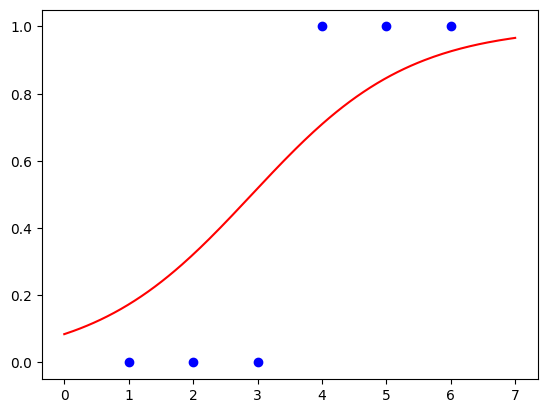

In [5]:
X_range = np.linspace(0, 7, 200).reshape(-1, 1) # create dense points for smooth curve 
prob_range = model.predict_proba(X_range)[:,1] 
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X_range, prob_range, color='red', label='Logistic Regression Curve')

Confusion Matrix
[[2 1]
 [0 3]]


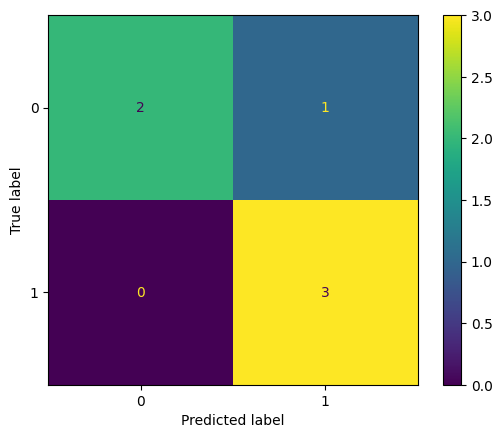

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(Y, model.predict(X)))
ConfusionMatrixDisplay.from_predictions(Y, model.predict(X))

In [12]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


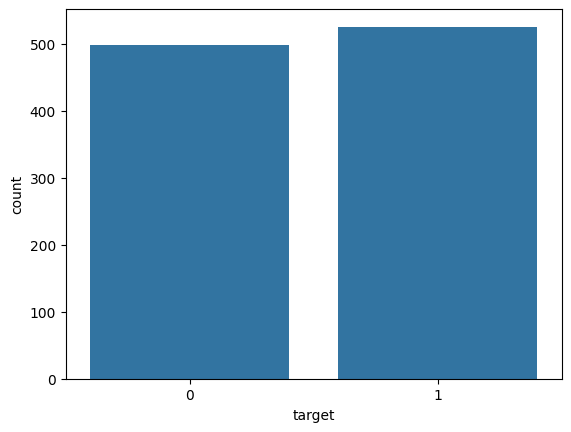

In [30]:
df.isna().sum()
sns.countplot(x=df['target'])
plt.show()

In [26]:
X=df.drop("target",axis=1)
Y=df["target"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model2=LogisticRegression()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
model2.fit(x_train, y_train)
print("Accuracy",accuracy_score(y_test, model2.predict(x_test)))
print("classification report")
print(classification_report(y_test, model2.predict(x_test)))
print("Confusion Matrix")
print(confusion_matrix(y_test, model2.predict(x_test)))

Accuracy 0.7951219512195122
classification report
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Confusion Matrix
[[73 29]
 [13 90]]
